In [1]:
import findspark

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
findspark.init("C:\spark\spark-3.3.2-bin-hadoop2")

In [5]:
import os
from pyspark.sql.functions import col, to_timestamp

In [6]:
os.listdir()

['.ipynb_checkpoints', '2018.csv', 'Project(Airline).ipynb', 'spark-warehouse']

In [7]:
import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession

# spark = SparkSession.builder.getOrCreate()
# Create a Spark session
spark = SparkSession.builder \
         .appName("Used") \
         .config("spark.executor.memory", "8g") \
         .config("spark.driver.memory", "3g") \
         .getOrCreate()
airline=spark.read.format("csv").option("header","true").option("inferSchema",'True').load(r'2018.csv')

In [8]:
airline.head()

Row(FL_DATE=datetime.datetime(2018, 1, 1, 0, 0), OP_CARRIER='UA', OP_CARRIER_FL_NUM=2429, ORIGIN='EWR', DEST='DEN', CRS_DEP_TIME=1517, DEP_TIME=1512.0, DEP_DELAY=-5.0, TAXI_OUT=15.0, WHEELS_OFF=1527.0, WHEELS_ON=1712.0, TAXI_IN=10.0, CRS_ARR_TIME=1745, ARR_TIME=1722.0, ARR_DELAY=-23.0, CANCELLED=0.0, CANCELLATION_CODE=None, DIVERTED=0.0, CRS_ELAPSED_TIME=268.0, ACTUAL_ELAPSED_TIME=250.0, AIR_TIME=225.0, DISTANCE=1605.0, CARRIER_DELAY=None, WEATHER_DELAY=None, NAS_DELAY=None, SECURITY_DELAY=None, LATE_AIRCRAFT_DELAY=None, Unnamed: 27=None)

In [13]:
print(airline.describe().toPandas())

  summary OP_CARRIER   OP_CARRIER_FL_NUM   ORIGIN     DEST  \
0   count    7213446             7213446  7213446  7213446   
1    mean       None  2607.5313346769353     None     None   
2  stddev       None  1860.1222647858165     None     None   
3     min         9E                   1      ABE      ABE   
4     max         YX                7909      YUM      YUM   

         CRS_DEP_TIME            DEP_TIME           DEP_DELAY  \
0             7213446             7101129             7096212   
1  1329.6870178275403  1333.8538055005056   9.969858425875664   
2   490.9319815381612  504.50554835428966  44.829640764696094   
3                   1                 1.0              -122.0   
4                2359              2400.0              2710.0   

             TAXI_OUT          WHEELS_OFF  ...    CRS_ELAPSED_TIME  \
0             7097616             7097617  ...             7213436   
1  17.410614211870577  1357.7988777078278  ...  141.13564825417458   
2   9.920409137662036   50

In [14]:
# import pandas as pd
# from pyspark.sql import SparkSession

# # Assuming you've created a SparkSession named 'spark'
# # Assuming 'airline' is your Spark DataFrame

# # Collect rows from the Spark DataFrame
# rows = airline.limit(5).collect()

# # Create a list of dictionaries for each row
# row_dicts = [row.asDict() for row in rows]

# # Convert the list of dictionaries to a Pandas DataFrame
# pandas_df = pd.DataFrame(row_dicts)



In [15]:
# pandas_df


In [16]:
airline.count()

7213446

In [17]:
airline.distinct().count()

7213446

In [18]:
airline.count() - airline.distinct().count() 

0

In [19]:
# airline_pandas = airline.limit(3).toPandas()
# display(airline_pandas)

In [20]:
airline.printSchema()

root
 |-- FL_DATE: timestamp (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- OP_CARRIER_FL_NUM: integer (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_TIME: double (nullable = true)
 |-- DEP_DELAY: double (nullable = true)
 |-- TAXI_OUT: double (nullable = true)
 |-- WHEELS_OFF: double (nullable = true)
 |-- WHEELS_ON: double (nullable = true)
 |-- TAXI_IN: double (nullable = true)
 |-- CRS_ARR_TIME: integer (nullable = true)
 |-- ARR_TIME: double (nullable = true)
 |-- ARR_DELAY: double (nullable = true)
 |-- CANCELLED: double (nullable = true)
 |-- CANCELLATION_CODE: string (nullable = true)
 |-- DIVERTED: double (nullable = true)
 |-- CRS_ELAPSED_TIME: double (nullable = true)
 |-- ACTUAL_ELAPSED_TIME: double (nullable = true)
 |-- AIR_TIME: double (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CARRIER_DELAY: double (nullable = true)
 |-- WEATHER_DELAY:

In [21]:
def null_values(df):
    for i in df.columns:
        print(i,(20-len(i))*"-",">",((df.filter(df[i].isNull()).count())/df.count())*100)
   

In [22]:
null_values(airline)

FL_DATE ------------- > 0.0
OP_CARRIER ---------- > 0.0
OP_CARRIER_FL_NUM --- > 0.0
ORIGIN -------------- > 0.0
DEST ---------------- > 0.0
CRS_DEP_TIME -------- > 0.0
DEP_TIME ------------ > 1.5570505414471807
DEP_DELAY ----------- > 1.6252149111534209
TAXI_OUT ------------ > 1.6057512595228411
WHEELS_OFF ---------- > 1.605737396523104
WHEELS_ON ----------- > 1.653107266624024
TAXI_IN ------------- > 1.653107266624024
CRS_ARR_TIME -------- > 0.0
ARR_TIME ------------ > 1.653093403624287
ARR_DELAY ----------- > 1.8997854839420716
CANCELLED ----------- > 0.0
CANCELLATION_CODE --- > 98.38379603867556
DIVERTED ------------ > 0.0
CRS_ELAPSED_TIME ---- > 0.00013862999736880265
ACTUAL_ELAPSED_TIME - > 1.8637694106256566
AIR_TIME ------------ > 1.8637694106256566
DISTANCE ------------ > 0.0
CARRIER_DELAY ------- > 81.2473816259247
WEATHER_DELAY ------- > 81.2473816259247
NAS_DELAY ----------- > 81.2473816259247
SECURITY_DELAY ------ > 81.2473816259247
LATE_AIRCRAFT_DELAY - > 81.2473816259247


In [23]:
df=airline

In [24]:
df.columns

['FL_DATE',
 'OP_CARRIER',
 'OP_CARRIER_FL_NUM',
 'ORIGIN',
 'DEST',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'DEP_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'WHEELS_ON',
 'TAXI_IN',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'ARR_DELAY',
 'CANCELLED',
 'CANCELLATION_CODE',
 'DIVERTED',
 'CRS_ELAPSED_TIME',
 'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'CARRIER_DELAY',
 'WEATHER_DELAY',
 'NAS_DELAY',
 'SECURITY_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'Unnamed: 27']

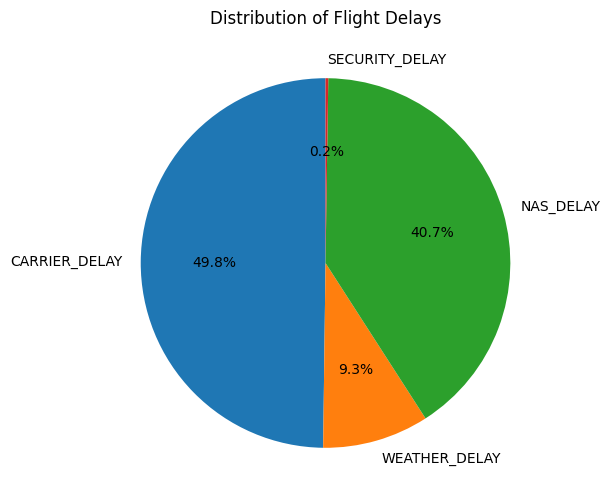

In [25]:
# Create a pie chart for delay distribution
plt.figure(figsize=(10, 6))

# Sum the delays for each category
delay_totals = df[['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY']].toPandas().sum()

# Define the labels for the pie chart
labels = delay_totals.index

# Define the values for the pie chart
sizes = delay_totals.values

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Distribution of Flight Delays')

# Display the pie chart
plt.show()


In [26]:
#As we can see carrier delay is contributing more for delays
del delay_totals

In [27]:
# Dropping columns with null values greater than 80%
for i in df.columns:
    if (((df.filter(df[i].isNull()).count())/df.count())*100)>80:
        df=df.drop(i)
        
df.show()

+-------------------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+--------+----------------+-------------------+--------+--------+
|            FL_DATE|OP_CARRIER|OP_CARRIER_FL_NUM|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|
+-------------------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+--------+----------------+-------------------+--------+--------+
|2018-01-01 00:00:00|        UA|             2429|   EWR| DEN|        1517|  1512.0|     -5.0|    15.0|    1527.0|   1712.0|   10.0|        1745|  1722.0|    -23.0|      0.0|     0.0|           268.0|              250.0|   225.0|  1605.0|
|2018-01-01 00:00:00|        UA|            

In [31]:
len(airline.columns)

28

In [32]:
len(df.columns)

21

In [33]:
df.columns

['FL_DATE',
 'OP_CARRIER',
 'OP_CARRIER_FL_NUM',
 'ORIGIN',
 'DEST',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'DEP_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'WHEELS_ON',
 'TAXI_IN',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'ARR_DELAY',
 'CANCELLED',
 'DIVERTED',
 'CRS_ELAPSED_TIME',
 'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE']

In [34]:
to_be_dropped=list(set(airline.columns) - set(df.columns))
to_be_dropped
# this contain the col dropped from the df table

['SECURITY_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'CANCELLATION_CODE',
 'WEATHER_DELAY',
 'NAS_DELAY',
 'Unnamed: 27',
 'CARRIER_DELAY']

In [35]:
len(to_be_dropped)

7

In [36]:
null_values(df)

FL_DATE ------------- > 0.0
OP_CARRIER ---------- > 0.0
OP_CARRIER_FL_NUM --- > 0.0
ORIGIN -------------- > 0.0
DEST ---------------- > 0.0
CRS_DEP_TIME -------- > 0.0
DEP_TIME ------------ > 1.5570505414471807
DEP_DELAY ----------- > 1.6252149111534209
TAXI_OUT ------------ > 1.6057512595228411
WHEELS_OFF ---------- > 1.605737396523104
WHEELS_ON ----------- > 1.653107266624024
TAXI_IN ------------- > 1.653107266624024
CRS_ARR_TIME -------- > 0.0
ARR_TIME ------------ > 1.653093403624287
ARR_DELAY ----------- > 1.8997854839420716
CANCELLED ----------- > 0.0
DIVERTED ------------ > 0.0
CRS_ELAPSED_TIME ---- > 0.00013862999736880265
ACTUAL_ELAPSED_TIME - > 1.8637694106256566
AIR_TIME ------------ > 1.8637694106256566
DISTANCE ------------ > 0.0


In [37]:
from pyspark.sql.functions import to_date
from pyspark.sql.functions import col

In [38]:
df.printSchema()

root
 |-- FL_DATE: timestamp (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- OP_CARRIER_FL_NUM: integer (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_TIME: double (nullable = true)
 |-- DEP_DELAY: double (nullable = true)
 |-- TAXI_OUT: double (nullable = true)
 |-- WHEELS_OFF: double (nullable = true)
 |-- WHEELS_ON: double (nullable = true)
 |-- TAXI_IN: double (nullable = true)
 |-- CRS_ARR_TIME: integer (nullable = true)
 |-- ARR_TIME: double (nullable = true)
 |-- ARR_DELAY: double (nullable = true)
 |-- CANCELLED: double (nullable = true)
 |-- DIVERTED: double (nullable = true)
 |-- CRS_ELAPSED_TIME: double (nullable = true)
 |-- ACTUAL_ELAPSED_TIME: double (nullable = true)
 |-- AIR_TIME: double (nullable = true)
 |-- DISTANCE: double (nullable = true)



In [39]:
df=df.withColumn("FL_DATE",to_date(col("FL_DATE"),"yyyy-MM-dd"))

In [40]:
from pyspark.sql.types import StringType

df = df.withColumn("OP_CARRIER_FL_NUM",df["OP_CARRIER_FL_NUM"].cast(StringType()))

In [41]:
df.select('OP_CARRIER_FL_NUM').dtypes

[('OP_CARRIER_FL_NUM', 'string')]

In [42]:
df.select('OP_CARRIER').distinct().show()

+----------+
|OP_CARRIER|
+----------+
|        UA|
|        NK|
|        AA|
|        EV|
|        B6|
|        DL|
|        OO|
|        F9|
|        YV|
|        MQ|
|        OH|
|        HA|
|        G4|
|        YX|
|        AS|
|        VX|
|        WN|
|        9E|
+----------+



In [43]:
from pyspark.sql.functions import regexp_replace

l={'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'}

# creating a dictionary l that maps airline codes to airline names.


l=list(l.items())  # returns a list of key-value pairs,converts the dictionary to a list of tuples

for i in range(18):
    df=df.withColumn('OP_CARRIER', regexp_replace('OP_CARRIER', l[i][0], l[i][1]))

In [44]:
df.select('OP_CARRIER').distinct().show()

+------------------+
|        OP_CARRIER|
+------------------+
|      Mesa Airline|
|     Allegiant Air|
|   United Airlines|
|    Virgin America|
| Hawaiian Airlines|
|  Republic Airways|
|        ExpressJet|
|  SkyWest Airlines|
| Frontier Airlines|
|      Endeavor Air|
| American Airlines|
|   JetBlue Airways|
|         Envoy Air|
|    Delta Airlines|
|      PSA Airlines|
|   Alaska Airlines|
|   Spirit Airlines|
|Southwest Airlines|
+------------------+



In [45]:
df.agg({'CANCELLED': 'sum'})

DataFrame[sum(CANCELLED): double]

In [46]:
df.agg({'CANCELLED': 'sum'}).show()

+--------------+
|sum(CANCELLED)|
+--------------+
|      116584.0|
+--------------+



In [47]:
df.select('CANCELLED').distinct().show()

+---------+
|CANCELLED|
+---------+
|      0.0|
|      1.0|
+---------+



In [48]:
# CANCELLED
# Flight Cancelled (1 = cancelled)
# Flight Not Cancelled (0 = not cancelled)

In [49]:
cancelled=df.filter(df['CANCELLED']>0)

In [50]:
cancelled.show()

+----------+---------------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+--------+----------------+-------------------+--------+--------+
|   FL_DATE|     OP_CARRIER|OP_CARRIER_FL_NUM|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|
+----------+---------------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+--------+----------------+-------------------+--------+--------+
|2018-01-01|United Airlines|             2034|   IAH| MFE|        1440|    null|     null|    null|      null|     null|   null|        1601|    null|     null|      1.0|     0.0|            81.0|               null|    null|   316.0|
|2018-01-01|United Airlines|              864|   LAS| SFO|  

In [51]:
# Delayed Flights

In [52]:
# Total Delay on Arrival in minutes
df.select('ARR_DELAY').show()

+---------+
|ARR_DELAY|
+---------+
|    -23.0|
|    -24.0|
|    -13.0|
|     -2.0|
|     14.0|
|    -11.0|
|    -16.0|
|    -19.0|
|     -2.0|
|    -17.0|
|    -16.0|
|    129.0|
|    -26.0|
|     -3.0|
|     73.0|
|     55.0|
|     25.0|
|     29.0|
|    -18.0|
|    -21.0|
+---------+
only showing top 20 rows



In [53]:
delay=df.filter(df['ARR_DELAY']>0)
delay.show() 

#delay contains delayed flights only

+----------+---------------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+--------+----------------+-------------------+--------+--------+
|   FL_DATE|     OP_CARRIER|OP_CARRIER_FL_NUM|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|
+----------+---------------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+--------+----------------+-------------------+--------+--------+
|2018-01-01|United Airlines|             2424|   ORD| ALB|         630|   650.0|     20.0|    13.0|     703.0|    926.0|   10.0|         922|   936.0|     14.0|      0.0|     0.0|           112.0|              106.0|    83.0|   723.0|
|2018-01-01|United Airlines|             2416|   ORD| CLE|  

In [54]:
for i in delay.columns:
    print(i,(20-len(i))*"-",">",delay.count())

FL_DATE ------------- > 2516050
OP_CARRIER ---------- > 2516050
OP_CARRIER_FL_NUM --- > 2516050
ORIGIN -------------- > 2516050
DEST ---------------- > 2516050
CRS_DEP_TIME -------- > 2516050
DEP_TIME ------------ > 2516050
DEP_DELAY ----------- > 2516050
TAXI_OUT ------------ > 2516050
WHEELS_OFF ---------- > 2516050
WHEELS_ON ----------- > 2516050
TAXI_IN ------------- > 2516050
CRS_ARR_TIME -------- > 2516050
ARR_TIME ------------ > 2516050
ARR_DELAY ----------- > 2516050
CANCELLED ----------- > 2516050
DIVERTED ------------ > 2516050
CRS_ELAPSED_TIME ---- > 2516050
ACTUAL_ELAPSED_TIME - > 2516050
AIR_TIME ------------ > 2516050
DISTANCE ------------ > 2516050


In [55]:
df=df.withColumn('ARR_DELAY',col('ARR_DELAY')/60)

df=df.withColumn('DEP_DELAY',col('DEP_DELAY')/60) 

In [56]:
# Save the DataFrame as a CSV file

In [57]:
# If a number is positive = flight delayed

# Since we're exploring only delayed flights, non-delayed should be discarded.

# The danger of keeping those is if we summarise for plotting for example, we'll get false data Sum of Delayed minutes will be less because of the negative numbers that will lessen the real delays

# Let's first define what a delayed flight is: A Delayed flight is a flight that arrives late at its destination.

# Flight can be delayed on departure but still, arrive on time = not a delayed flight

In [58]:
delay_Pandas = delay.toPandas()
delay_Pandas.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2018-01-01,United Airlines,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,10.0,922,936.0,14.0,0.0,0.0,112.0,106.0,83.0,723.0
1,2018-01-01,United Airlines,2416,ORD,CLE,2059,2300.0,121.0,24.0,2324.0,...,8.0,2311,120.0,129.0,0.0,0.0,72.0,80.0,48.0,316.0
2,2018-01-01,United Airlines,2413,ORD,BTV,2114,2230.0,76.0,14.0,2244.0,...,5.0,15,128.0,73.0,0.0,0.0,121.0,118.0,99.0,763.0
3,2018-01-01,United Airlines,2412,MCO,LAX,653,747.0,54.0,14.0,801.0,...,22.0,930,1025.0,55.0,0.0,0.0,337.0,338.0,302.0,2218.0
4,2018-01-01,United Airlines,2411,EWR,SMF,1810,1922.0,72.0,16.0,1938.0,...,4.0,2136,2201.0,25.0,0.0,0.0,386.0,339.0,319.0,2500.0


In [59]:
delay_Pandas.to_csv('E:\ProjectCDAC\Processed_df_18.csv')

In [60]:
import matplotlib.pyplot as plt

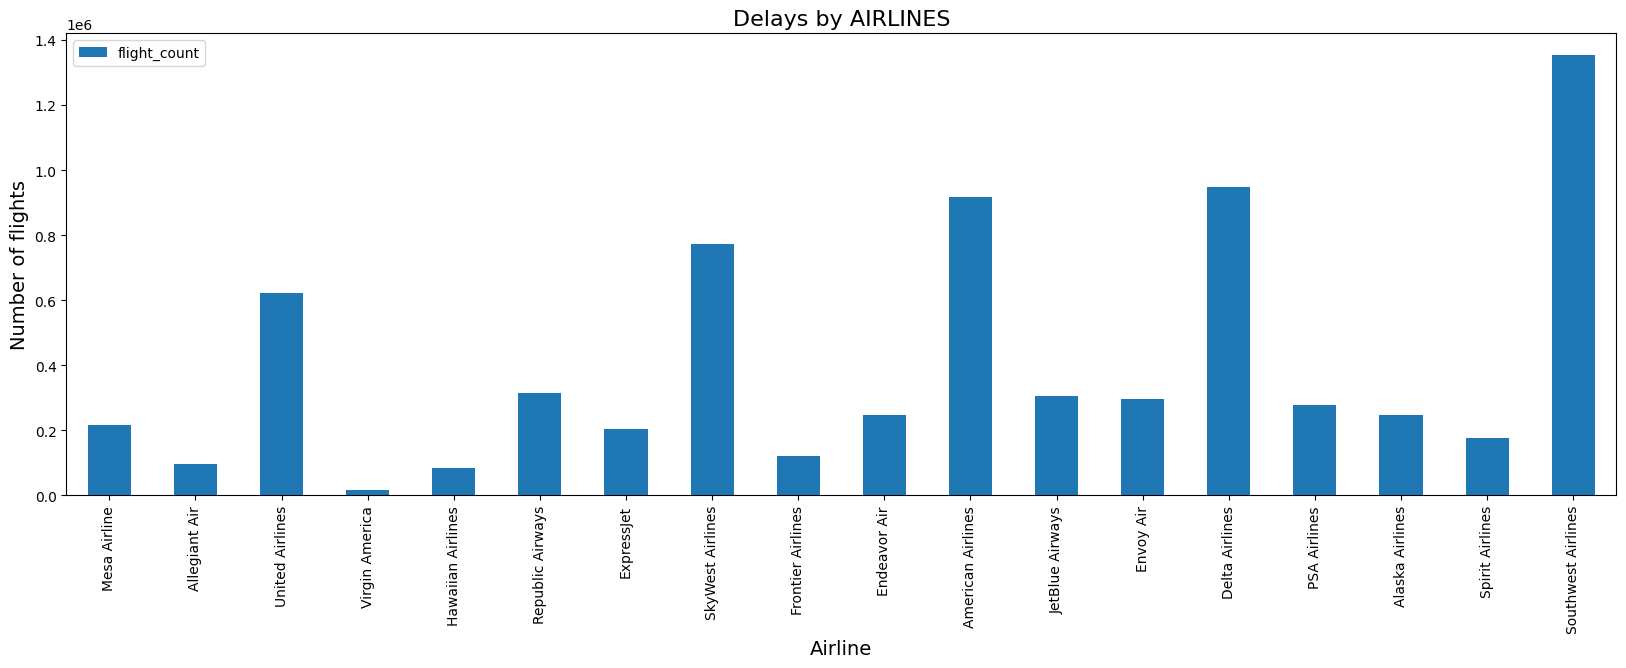

In [61]:
import pandas as pd
import pyspark.sql.functions as F


# group by airline and count the number of flights
flight_counts = df.groupBy('OP_CARRIER').agg(F.count('*').alias('flight_count'))

# convert the PySpark DataFrame to a Pandas DataFrame
flight_counts_pd = flight_counts.toPandas()

# generate the bar plot using Pandas' plot method
flight_counts_pd.plot.bar(x='OP_CARRIER', y='flight_count', figsize=(20,6))
plt.title('Delays by AIRLINES', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Number of flights', fontsize=14)
plt.show()

In [62]:
null_values(df)

FL_DATE ------------- > 0.0
OP_CARRIER ---------- > 0.0
OP_CARRIER_FL_NUM --- > 0.0
ORIGIN -------------- > 0.0
DEST ---------------- > 0.0
CRS_DEP_TIME -------- > 0.0
DEP_TIME ------------ > 1.5570505414471807
DEP_DELAY ----------- > 1.6252149111534209
TAXI_OUT ------------ > 1.6057512595228411
WHEELS_OFF ---------- > 1.605737396523104
WHEELS_ON ----------- > 1.653107266624024
TAXI_IN ------------- > 1.653107266624024
CRS_ARR_TIME -------- > 0.0
ARR_TIME ------------ > 1.653093403624287
ARR_DELAY ----------- > 1.8997854839420716
CANCELLED ----------- > 0.0
DIVERTED ------------ > 0.0
CRS_ELAPSED_TIME ---- > 0.00013862999736880265
ACTUAL_ELAPSED_TIME - > 1.8637694106256566
AIR_TIME ------------ > 1.8637694106256566
DISTANCE ------------ > 0.0


In [63]:
from pyspark.sql.functions import year
from pyspark.sql.functions import month
from pyspark.sql.functions import dayofweek

In [64]:
delay=delay.withColumn('FL_YEAR',year(delay.FL_DATE))
delay=delay.withColumn('FL_MONTH',month(delay.FL_DATE))
delay=delay.withColumn('FL_DAYOFWEEK',dayofweek(delay.FL_DATE))

In [65]:
#Extract day of week and month
df=df.withColumn('FL_DAYOFWEEK',dayofweek(df.FL_DATE))
df=df.withColumn('FL_MONTH',month(df.FL_DATE))

#Cast to double
df=df.withColumn("FL_MONTH",col("FL_MONTH").cast('double'))
df=df.withColumn("FL_DAYOFWEEK",col("FL_DAYOFWEEK").cast('double'))

In [66]:
df.printSchema()

root
 |-- FL_DATE: date (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- OP_CARRIER_FL_NUM: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_TIME: double (nullable = true)
 |-- DEP_DELAY: double (nullable = true)
 |-- TAXI_OUT: double (nullable = true)
 |-- WHEELS_OFF: double (nullable = true)
 |-- WHEELS_ON: double (nullable = true)
 |-- TAXI_IN: double (nullable = true)
 |-- CRS_ARR_TIME: integer (nullable = true)
 |-- ARR_TIME: double (nullable = true)
 |-- ARR_DELAY: double (nullable = true)
 |-- CANCELLED: double (nullable = true)
 |-- DIVERTED: double (nullable = true)
 |-- CRS_ELAPSED_TIME: double (nullable = true)
 |-- ACTUAL_ELAPSED_TIME: double (nullable = true)
 |-- AIR_TIME: double (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- FL_DAYOFWEEK: double (nullable = true)
 |-- FL_MONTH: double (nullable = true)



In [67]:
df.columns

['FL_DATE',
 'OP_CARRIER',
 'OP_CARRIER_FL_NUM',
 'ORIGIN',
 'DEST',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'DEP_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'WHEELS_ON',
 'TAXI_IN',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'ARR_DELAY',
 'CANCELLED',
 'DIVERTED',
 'CRS_ELAPSED_TIME',
 'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'FL_DAYOFWEEK',
 'FL_MONTH']

In [68]:
del flight_counts_pd

In [69]:
df3=df.toPandas()

In [70]:
df3.describe()

,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FL_DAYOFWEEK,FL_MONTH
count,7.213446e+06,7.101129e+06,7.096212e+06,7.097616e+06,7.097617e+06,7.094200e+06,7.094200e+06,7.213446e+06,7.094201e+06,7.076406e+06,7.213446e+06,7.213446e+06,7.213436e+06,7.079004e+06,7.079004e+06,7.213446e+06,7.213446e+06,7.213446e+06
mean,1.329687e+03,1.333854e+03,1.661643e-01,1.741061e+01,1.357799e+03,1.462162e+03,7.601246e+00,1.486341e+03,1.466784e+03,8.414301e-02,1.616204e-02,2.475793e-03,1.411356e+02,1.364999e+02,1.115020e+02,7.999895e+02,3.942412e+00,6.564521e+00
std,4.909320e+02,5.045055e+02,7.471607e-01,9.920409e+00,5.059721e+02,5.334675e+02,6.064797e+00,5.183124e+02,5.377089e+02,7.821106e-01,1.260985e-01,4.969571e-02,7.334433e+01,7.313758e+01,7.111293e+01,5.981783e+02,1.964044e+00,3.395780e+00
min,1.000000e+00,1.000000e+00,-2.033333e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,1.400000e+01,7.000000e+00,3.100000e+01,1.000000e+00,1.000000e+00
25%,9.150000e+02,9.160000e+02,-8.333333e-02,1.100000e+01,9.320000e+02,1.044000e+03,4.000000e+00,1.100000e+03,1.049000e+03,-2.333333e-01,0.000000e+00,0.000000e+00,8.800000e+01,8.300000e+01,6.000000e+01,3.630000e+02,2.000000e+00,4.000000e+00
50%,1.320000e+03,1.326000e+03,-3.333333e-02,1.500000e+01,1.340000e+03,1.502000e+03,6.000000e+00,1.515000e+03,1.506000e+03,-1.000000e-01,0.000000e+00,0.000000e+00,1.220000e+02,1.180000e+02,9.200000e+01,6.320000e+02,4.000000e+00,7.000000e+00
75%,1.735000e+03,1.744000e+03,1.166667e-01,2.000000e+01,1.759000e+03,1.911000e+03,9.000000e+00,1.919000e+03,1.916000e+03,1.333333e-01,0.000000e+00,0.000000e+00,1.710000e+02,1.670000e+02,1.410000e+02,1.034000e+03,6.000000e+00,9.000000e+00
max,2.359000e+03,2.400000e+03,4.516667e+01,1.960000e+02,2.400000e+03,2.400000e+03,2.590000e+02,2.400000e+03,2.400000e+03,4.486667e+01,1.000000e+00,1.000000e+00,7.040000e+02,7.570000e+02,6.960000e+02,4.983000e+03,7.000000e+00,1.200000e+01


In [73]:
df3.isnull().sum()*100/len(df3)

FL_DATE                0.000000
OP_CARRIER             0.000000
OP_CARRIER_FL_NUM      0.000000
ORIGIN                 0.000000
DEST                   0.000000
CRS_DEP_TIME           0.000000
DEP_TIME               1.557051
DEP_DELAY              1.625215
TAXI_OUT               1.605751
WHEELS_OFF             1.605737
WHEELS_ON              1.653107
TAXI_IN                1.653107
CRS_ARR_TIME           0.000000
ARR_TIME               1.653093
ARR_DELAY              1.899785
CANCELLED              0.000000
DIVERTED               0.000000
CRS_ELAPSED_TIME       0.000139
ACTUAL_ELAPSED_TIME    1.863769
AIR_TIME               1.863769
DISTANCE               0.000000
FL_DAYOFWEEK           0.000000
FL_MONTH               0.000000
dtype: float64

In [74]:
df3.dtypes

FL_DATE                 object
OP_CARRIER              object
OP_CARRIER_FL_NUM       object
ORIGIN                  object
DEST                    object
CRS_DEP_TIME             int32
DEP_TIME               float64
DEP_DELAY              float64
TAXI_OUT               float64
WHEELS_OFF             float64
WHEELS_ON              float64
TAXI_IN                float64
CRS_ARR_TIME             int32
ARR_TIME               float64
ARR_DELAY              float64
CANCELLED              float64
DIVERTED               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
AIR_TIME               float64
DISTANCE               float64
FL_DAYOFWEEK           float64
FL_MONTH               float64
dtype: object

In [75]:
df3.columns

Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'FL_DAYOFWEEK', 'FL_MONTH'],
      dtype='object')

In [76]:
print(df3.select_dtypes(exclude=object).columns)

Index(['CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'FL_DAYOFWEEK', 'FL_MONTH'],
      dtype='object')


In [77]:
numeric=[]

In [78]:
for i in df3.select_dtypes(exclude=object).columns:
    numeric.append(i)

<Axes: >

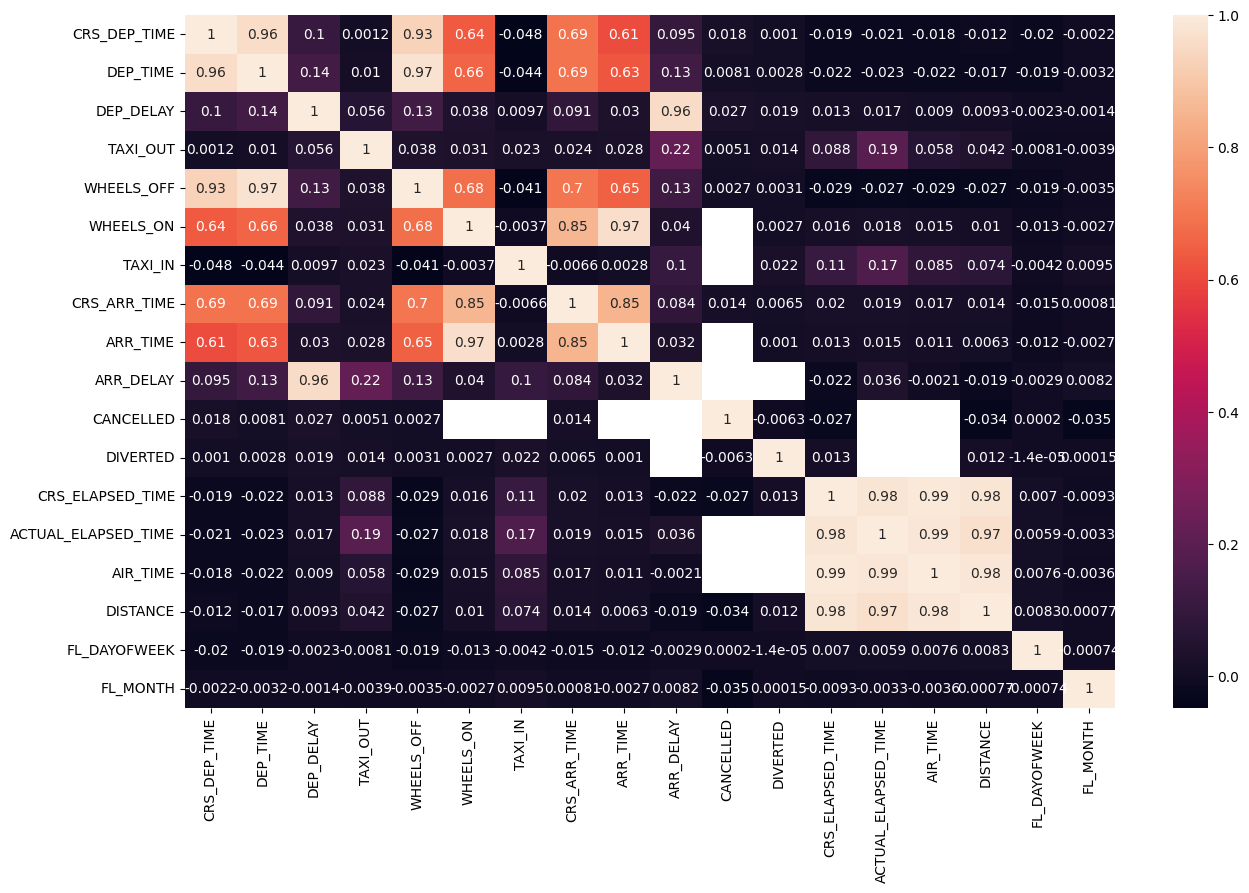

In [79]:
plt.figure(figsize=(15,9))
sns.heatmap(df3[numeric].corr(),annot=True)

In [80]:
df3.isnull().sum()*100/len(df3)

FL_DATE                0.000000
OP_CARRIER             0.000000
OP_CARRIER_FL_NUM      0.000000
ORIGIN                 0.000000
DEST                   0.000000
CRS_DEP_TIME           0.000000
DEP_TIME               1.557051
DEP_DELAY              1.625215
TAXI_OUT               1.605751
WHEELS_OFF             1.605737
WHEELS_ON              1.653107
TAXI_IN                1.653107
CRS_ARR_TIME           0.000000
ARR_TIME               1.653093
ARR_DELAY              1.899785
CANCELLED              0.000000
DIVERTED               0.000000
CRS_ELAPSED_TIME       0.000139
ACTUAL_ELAPSED_TIME    1.863769
AIR_TIME               1.863769
DISTANCE               0.000000
FL_DAYOFWEEK           0.000000
FL_MONTH               0.000000
dtype: float64

In [81]:
# Spark SQL

In [82]:
df3[df3['CANCELLED']==1]

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FL_DAYOFWEEK,FL_MONTH
178,2018-01-01,United Airlines,2034,IAH,MFE,1440,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,81.0,NaN,NaN,316.0,2.0,1.0
875,2018-01-01,United Airlines,864,LAS,SFO,1744,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,102.0,NaN,NaN,414.0,2.0,1.0
1244,2018-01-01,United Airlines,488,MFE,IAH,1726,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,78.0,NaN,NaN,316.0,2.0,1.0
1584,2018-01-01,Alaska Airlines,5,DCA,LAX,910,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,380.0,NaN,NaN,2311.0,2.0,1.0
1639,2018-01-01,Alaska Airlines,64,WRG,KTN,1623,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,32.0,NaN,NaN,82.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7212477,2018-12-31,SkyWest Airlines,7365,ABR,MSP,500,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,80.0,NaN,NaN,257.0,2.0,12.0
7212757,2018-12-31,American Airlines,147,LAX,EGE,840,839.0,-0.016667,NaN,NaN,...,NaN,NaN,1.0,0.0,145.0,NaN,NaN,748.0,2.0,12.0
7212759,2018-12-31,American Airlines,149,EGE,LAX,1444,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,142.0,NaN,NaN,748.0,2.0,12.0
7212772,2018-12-31,American Airlines,165,DFW,EGE,845,836.0,-0.150000,10.0,846.0,...,NaN,NaN,1.0,0.0,154.0,NaN,NaN,721.0,2.0,12.0


In [83]:
(df3.isnull().sum()/df3.count())*100

FL_DATE                0.000000
OP_CARRIER             0.000000
OP_CARRIER_FL_NUM      0.000000
ORIGIN                 0.000000
DEST                   0.000000
CRS_DEP_TIME           0.000000
DEP_TIME               1.581678
DEP_DELAY              1.652065
TAXI_OUT               1.631956
WHEELS_OFF             1.631942
WHEELS_ON              1.680894
TAXI_IN                1.680894
CRS_ARR_TIME           0.000000
ARR_TIME               1.680880
ARR_DELAY              1.936576
CANCELLED              0.000000
DIVERTED               0.000000
CRS_ELAPSED_TIME       0.000139
ACTUAL_ELAPSED_TIME    1.899165
AIR_TIME               1.899165
DISTANCE               0.000000
FL_DAYOFWEEK           0.000000
FL_MONTH               0.000000
dtype: float64

In [84]:
from pyspark.sql.functions import mean, when, col


In [85]:
selected_columns = ['DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'ARR_TIME', 'ARR_DELAY', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'CRS_ELAPSED_TIME']

# Calculate means for selected columns
mean_values = df.select([mean(col(column)).alias(column) for column in selected_columns]).collect()[0].asDict()

# Impute missing values with means
for column in selected_columns:
    df = df.withColumn(column, when(col(column).isNull(), mean_values[column]).otherwise(col(column)))


In [86]:
del df3


In [87]:
df3=df.toPandas()

<Axes: >

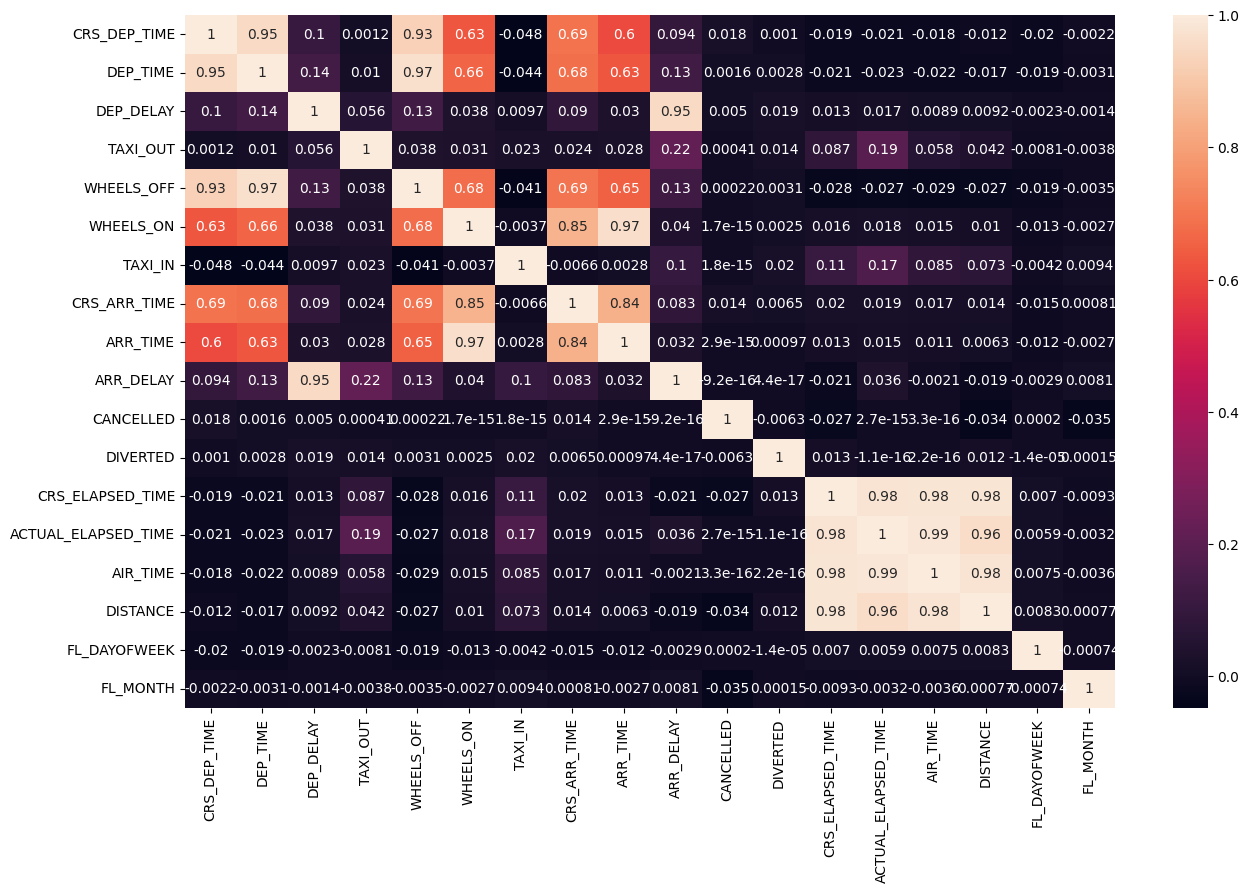

In [88]:
plt.figure(figsize=(15,9))
sns.heatmap(df3[numeric].corr(),annot=True)

In [89]:
# import pandas as pd

# # Assuming df is your pandas DataFrame
# # List of columns where you want to fill missing values
# columns_to_fill = ['DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'ARR_TIME', 'ARR_DELAY', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME','CRS_ELAPSED_TIME']

# # Calculate the mean of each column with missing values
# mean_values = df3[columns_to_fill].mean()

# # Fill missing values with their respective mean values
# df3[columns_to_fill] = df3[columns_to_fill].fillna(mean_values)

# # Now, df contains missing values in the specified columns filled with their respective means.


In [90]:
(df3.isnull().sum()/df3.count())*100

FL_DATE                0.0
OP_CARRIER             0.0
OP_CARRIER_FL_NUM      0.0
ORIGIN                 0.0
DEST                   0.0
CRS_DEP_TIME           0.0
DEP_TIME               0.0
DEP_DELAY              0.0
TAXI_OUT               0.0
WHEELS_OFF             0.0
WHEELS_ON              0.0
TAXI_IN                0.0
CRS_ARR_TIME           0.0
ARR_TIME               0.0
ARR_DELAY              0.0
CANCELLED              0.0
DIVERTED               0.0
CRS_ELAPSED_TIME       0.0
ACTUAL_ELAPSED_TIME    0.0
AIR_TIME               0.0
DISTANCE               0.0
FL_DAYOFWEEK           0.0
FL_MONTH               0.0
dtype: float64

In [92]:
del df3

NameError: name 'df3' is not defined

In [93]:
df.createOrReplaceTempView("df")

In [94]:
# Number Of Flights Cancelled in Each Month from 2018.

In [95]:
spark.sql("""
 SELECT FL_MONTH, COUNT(CANCELLED) AS TOTAL_CANCELLED
 FROM df
 WHERE CANCELLED = 1
 GROUP BY FL_MONTH
 ORDER BY FL_MONTH
 LIMIT 50
""").show()

+--------+---------------+
|FL_MONTH|TOTAL_CANCELLED|
+--------+---------------+
|     1.0|          17169|
|     2.0|           8976|
|     3.0|          17280|
|     4.0|           6251|
|     5.0|           7155|
|     6.0|          10694|
|     7.0|          11083|
|     8.0|          12353|
|     9.0|           8132|
|    10.0|           4485|
|    11.0|           6254|
|    12.0|           6752|
+--------+---------------+



In [96]:
# Number Of Flights Detoured in Each Month in 2018

In [97]:
spark.sql("""
 SELECT origin, COUNT(cancelled), op_carrier
 FROM df where cancelled = 1
 GROUP BY origin, op_carrier
""").show()

+------+----------------+-----------------+
|origin|count(cancelled)|       op_carrier|
+------+----------------+-----------------+
|   SLC|              16|     Mesa Airline|
|   PWM|              62|       ExpressJet|
|   TOL|              14| SkyWest Airlines|
|   HNL|              15|American Airlines|
|   ROW|               1|     Mesa Airline|
|   MIA|              39|Frontier Airlines|
|   MYR|              15|   Delta Airlines|
|   BTR|              77|       ExpressJet|
|   CMH|              20|     Mesa Airline|
|   GSP|              11|   Delta Airlines|
|   EUG|              12| SkyWest Airlines|
|   PIT|              30|     Mesa Airline|
|   AUS|              13| Republic Airways|
|   FAR|               8|       ExpressJet|
|   EVV|               7| SkyWest Airlines|
|   GSO|              66|       ExpressJet|
|   CLT|              55| SkyWest Airlines|
|   GGG|              29|        Envoy Air|
|   DEN|             199|Frontier Airlines|
|   MKG|              39| SkyWes

In [98]:
# Most cancelled flight

In [99]:
spark.sql(""" SELECT op_carrier, COUNT(cancelled) AS Total
FROM df where cancelled = 1
GROUP BY cancelled, op_carrier
ORDER BY Total desc
LIMIT 10
""").show()

+------------------+-----+
|        op_carrier|Total|
+------------------+-----+
|Southwest Airlines|18275|
| American Airlines|14945|
|      PSA Airlines|11870|
|         Envoy Air|10655|
|  SkyWest Airlines|10610|
|  Republic Airways|10100|
|   JetBlue Airways| 6419|
|      Endeavor Air| 6355|
|        ExpressJet| 5670|
|      Mesa Airline| 5530|
+------------------+-----+



In [100]:
# No. Of Flights canceled from origin city by airline fights in each year i.e.,2018.

In [101]:
spark.sql("""
 SELECT origin, COUNT(cancelled), op_carrier
 FROM df where cancelled = 1
 GROUP BY origin, op_carrier
""").show()

+------+----------------+-----------------+
|origin|count(cancelled)|       op_carrier|
+------+----------------+-----------------+
|   SLC|              16|     Mesa Airline|
|   PWM|              62|       ExpressJet|
|   TOL|              14| SkyWest Airlines|
|   HNL|              15|American Airlines|
|   ROW|               1|     Mesa Airline|
|   MIA|              39|Frontier Airlines|
|   MYR|              15|   Delta Airlines|
|   BTR|              77|       ExpressJet|
|   CMH|              20|     Mesa Airline|
|   GSP|              11|   Delta Airlines|
|   EUG|              12| SkyWest Airlines|
|   PIT|              30|     Mesa Airline|
|   AUS|              13| Republic Airways|
|   FAR|               8|       ExpressJet|
|   EVV|               7| SkyWest Airlines|
|   GSO|              66|       ExpressJet|
|   CLT|              55| SkyWest Airlines|
|   GGG|              29|        Envoy Air|
|   DEN|             199|Frontier Airlines|
|   MKG|              39| SkyWes

In [102]:
# Flight has least amount of delay(planed departure = actual departure)

In [103]:
spark.sql("""SELECT OP_CARRIER_FL_NUM, MIN(abs(CRS_DEP_TIME - DEP_DELAY)) AS min_delay
FROM df 
GROUP BY OP_CARRIER_FL_NUM
ORDER BY min_delay ASC
LIMIT 5
""").show()

+-----------------+-------------------+
|OP_CARRIER_FL_NUM|          min_delay|
+-----------------+-------------------+
|             1664| 0.1333333333333333|
|              340| 0.1333333333333333|
|             2766|0.16666666666666607|
|              456|0.23333333333333328|
|             1462| 0.2999999999999998|
+-----------------+-------------------+



In [104]:
# Airport has high delay(busy) most of the time

In [105]:
spark.sql("""SELECT origin, AVG(dep_delay) AS avg_delay
FROM df
WHERE dep_delay > 0
GROUP BY origin
ORDER BY avg_delay DESC
LIMIT 1
""").show()

+------+------------------+
|origin|         avg_delay|
+------+------------------+
|   DVL|1.8820885902128015|
+------+------------------+



In [106]:
# Airports having least amount of wheels off time (operations and management is good)

In [107]:
spark.sql("""SELECT origin, avg(abs(wheels_off - DEP_TIME)) AS avg_wo_time
FROM df
GROUP BY origin
ORDER BY avg_wo_time ASC
LIMIT 10
""").show()

+------+------------------+
|origin|       avg_wo_time|
+------+------------------+
|   SMX|12.064705882352941|
|   HYA|12.639832271992384|
|   BKG|13.266058372037246|
|   OTZ| 13.41587382203996|
|   OME|13.586141770186568|
|   YAK|13.675139504256542|
|   OGD|13.824960890534303|
|   BRW| 14.06091600920934|
|   LWS|14.136604005867955|
|   AKN|14.238095238095237|
+------+------------------+



In [108]:
# Airports having high amount of wheels off time (operations and management is bad)

In [109]:
spark.sql("""SELECT origin, avg(abs(wheels_off - DEP_TIME)) AS avg_wo_time
FROM df
GROUP BY origin
ORDER BY avg_wo_time desc
LIMIT 10
""").show()

+------+------------------+
|origin|       avg_wo_time|
+------+------------------+
|   PPG|208.65573770491804|
|   JMS| 76.40998313603322|
|   FAI| 74.13872728769371|
|   LAX|  64.1479851316157|
|   SFO| 64.10281010266276|
|   JFK| 61.49598337564785|
|   YNG|              58.5|
|   ANC| 57.81740440941658|
|   LGA| 48.17481588421418|
|   SEA|  48.1143847739563|
+------+------------------+



In [110]:
# Most appropriate time to reach at airport for travelers

In [111]:
spark.sql(""" select sum(abs(CRS_DEP_TIME - DEP_TIME))/count(DEP_TIME) as REACH_TIME from df""").show()

+-----------------+
|       REACH_TIME|
+-----------------+
|41.05092734351033|
+-----------------+



In [112]:
# Feature Transformation

In [113]:
#Imbalance

In [114]:
df4=df.toPandas()

In [117]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 23 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    object 
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int32  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int32  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  DIVERTED             float64
 17  CRS_ELAPSED_TIME     float64
 18  ACTUAL_ELAPSED_TIME  float64
 19  AIR_TIME             float64
 20  DISTANCE             float64
 21  FL_DAYOFWEEK         float64
 22  FL_MONTH             float64
dtypes: float64(16), int32(2), object

In [118]:
bd1 = delay.withColumn('Delayed', (delay.ARR_DELAY >=10).cast('int'))


In [121]:
bd1.toPandas()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FL_YEAR,FL_MONTH,FL_DAYOFWEEK,Delayed
0,2018-01-01,United Airlines,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,0.0,0.0,112.0,106.0,83.0,723.0,2018,1,2,1
1,2018-01-01,United Airlines,2416,ORD,CLE,2059,2300.0,121.0,24.0,2324.0,...,0.0,0.0,72.0,80.0,48.0,316.0,2018,1,2,1
2,2018-01-01,United Airlines,2413,ORD,BTV,2114,2230.0,76.0,14.0,2244.0,...,0.0,0.0,121.0,118.0,99.0,763.0,2018,1,2,1
3,2018-01-01,United Airlines,2412,MCO,LAX,653,747.0,54.0,14.0,801.0,...,0.0,0.0,337.0,338.0,302.0,2218.0,2018,1,2,1
4,2018-01-01,United Airlines,2411,EWR,SMF,1810,1922.0,72.0,16.0,1938.0,...,0.0,0.0,386.0,339.0,319.0,2500.0,2018,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516045,2018-12-31,American Airlines,1811,CLT,TPA,1644,1639.0,-5.0,40.0,1719.0,...,0.0,0.0,106.0,120.0,77.0,507.0,2018,12,2,0
2516046,2018-12-31,American Airlines,1814,DFW,PHL,1955,2026.0,31.0,12.0,2038.0,...,0.0,0.0,182.0,160.0,142.0,1303.0,2018,12,2,0
2516047,2018-12-31,American Airlines,1816,CLT,DFW,1751,1757.0,6.0,18.0,1815.0,...,0.0,0.0,181.0,176.0,148.0,936.0,2018,12,2,0
2516048,2018-12-31,American Airlines,1817,CLT,MEM,2015,2010.0,-5.0,36.0,2046.0,...,0.0,0.0,112.0,128.0,88.0,511.0,2018,12,2,1


In [125]:
ct=bd1.toPandas()

In [132]:
#Checking whether our data is imbalanced

<Axes: xlabel='Delayed', ylabel='count'>

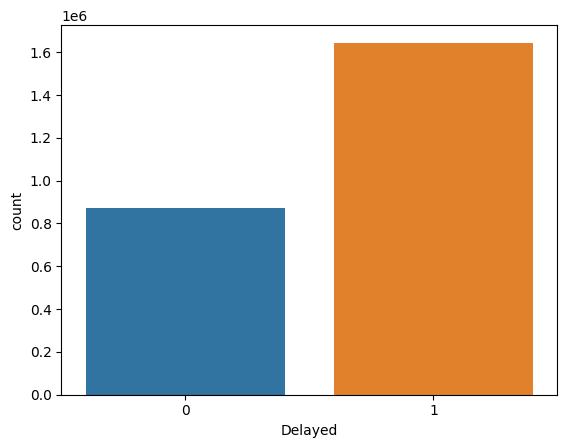

In [133]:
sns.countplot(x='Delayed',data=ct)

In [145]:
del ct

NameError: name 'ct' is not defined

In [146]:
bd1 = delay.withColumn('Delayed', (delay.ARR_DELAY >=10).cast('int'))

In [147]:
bd1.select('Delayed').distinct().show() # Delayed flights

+-------+
|Delayed|
+-------+
|      1|
|      0|
+-------+



In [148]:
bd1.createOrReplaceTempView("bd1")

# The createOrReplaceTempView() function is a PySpark DataFrame API function 
# that creates or replaces a temporary view with the specified name in Spark's SQL engine.

In [149]:
bd1 = spark.sql("select *, case \
               when DEP_TIME <= 800 then 1 \
               when 800 < DEP_TIME and DEP_TIME <= 1200 then 2 \
               when 1200 < DEP_TIME and DEP_TIME <= 1600 then 3 \
               when 1600 < DEP_TIME and DEP_TIME <= 2100 then 4 \
               else 1 end as TimeSlot \
               from bd1")

In [150]:
from pyspark.ml.feature import StringIndexer

In [151]:
indexer1 = StringIndexer(inputCol='OP_CARRIER',outputCol='INDEX_CARRIER') 
bd2=indexer1.fit(bd1).transform(bd1)

indexer2 = StringIndexer(inputCol='ORIGIN',outputCol='INDEX_ORIGIN') 
bd3=indexer2.fit(bd2).transform(bd2)

bd3.groupBy('OP_CARRIER','INDEX_CARRIER').count().sort('INDEX_CARRIER').show()

+------------------+-------------+------+
|        OP_CARRIER|INDEX_CARRIER| count|
+------------------+-------------+------+
|Southwest Airlines|          0.0|513106|
| American Airlines|          1.0|336974|
|  SkyWest Airlines|          2.0|265057|
|    Delta Airlines|          3.0|261185|
|   United Airlines|          4.0|214528|
|   JetBlue Airways|          5.0|126936|
|      PSA Airlines|          6.0|106844|
|         Envoy Air|          7.0|105492|
|  Republic Airways|          8.0|100386|
|   Alaska Airlines|          9.0| 84597|
|      Mesa Airline|         10.0| 79640|
|      Endeavor Air|         11.0| 73316|
|        ExpressJet|         12.0| 68244|
|   Spirit Airlines|         13.0| 56368|
| Frontier Airlines|         14.0| 52413|
|     Allegiant Air|         15.0| 37177|
| Hawaiian Airlines|         16.0| 27449|
|    Virgin America|         17.0|  6338|
+------------------+-------------+------+



In [152]:
from pyspark.sql.functions import *

delay.stat.corr('FL_DAYOFWEEK','ARR_DELAY')

-0.0087099126026231

In [153]:
delay.columns

['FL_DATE',
 'OP_CARRIER',
 'OP_CARRIER_FL_NUM',
 'ORIGIN',
 'DEST',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'DEP_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'WHEELS_ON',
 'TAXI_IN',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'ARR_DELAY',
 'CANCELLED',
 'DIVERTED',
 'CRS_ELAPSED_TIME',
 'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'FL_YEAR',
 'FL_MONTH',
 'FL_DAYOFWEEK']

In [154]:
from pyspark.sql.functions import *

delay.stat.corr('FL_DAYOFWEEK','ARR_DELAY')

-0.008709912602623101

In [155]:
bd4=bd3.select('DEP_DELAY',
             'DISTANCE', 
             'FL_DAYOFWEEK',
             'INDEX_CARRIER', 
             'TimeSlot',
             'Delayed',
             'FL_MONTH',
             'ACTUAL_ELAPSED_TIME',
             'INDEX_ORIGIN')
             
bd4.limit(10).toPandas()

,DEP_DELAY,DISTANCE,FL_DAYOFWEEK,INDEX_CARRIER,TimeSlot,Delayed,FL_MONTH,ACTUAL_ELAPSED_TIME,INDEX_ORIGIN
0,20.0,723.0,2,4.0,1,1,1,106.0,0.0
1,121.0,316.0,2,4.0,1,1,1,80.0,0.0
2,76.0,763.0,2,4.0,1,1,1,118.0,0.0
3,54.0,2218.0,2,4.0,1,1,1,338.0,13.0
4,72.0,2500.0,2,4.0,4,1,1,339.0,11.0
5,47.0,1068.0,2,4.0,3,1,1,149.0,50.0
6,14.0,631.0,2,4.0,2,0,1,131.0,11.0
7,8.0,1874.0,2,4.0,3,1,1,262.0,146.0
8,48.0,1167.0,2,4.0,1,1,1,150.0,36.0
9,-3.0,1065.0,2,4.0,4,0,1,200.0,11.0


In [156]:
# Imputing Null values

In [157]:
# null_values(bd4)

In [158]:
from pyspark.ml.feature import Imputer

In [159]:
imputer = Imputer(
    inputCols = bd4.columns,
    outputCols = ["{}".format(a) for a in bd4.columns]
).setStrategy("median")

In [160]:

b5=imputer.fit(bd4)

In [161]:
bd6=b5.transform(bd4)

In [162]:
bd6.limit(10).toPandas()

,DEP_DELAY,DISTANCE,FL_DAYOFWEEK,INDEX_CARRIER,TimeSlot,Delayed,FL_MONTH,ACTUAL_ELAPSED_TIME,INDEX_ORIGIN
0,20.0,723.0,2,4.0,1,1,1,106.0,0.0
1,121.0,316.0,2,4.0,1,1,1,80.0,0.0
2,76.0,763.0,2,4.0,1,1,1,118.0,0.0
3,54.0,2218.0,2,4.0,1,1,1,338.0,13.0
4,72.0,2500.0,2,4.0,4,1,1,339.0,11.0
5,47.0,1068.0,2,4.0,3,1,1,149.0,50.0
6,14.0,631.0,2,4.0,2,0,1,131.0,11.0
7,8.0,1874.0,2,4.0,3,1,1,262.0,146.0
8,48.0,1167.0,2,4.0,1,1,1,150.0,36.0
9,-3.0,1065.0,2,4.0,4,0,1,200.0,11.0


In [163]:
# One Hot Encoding

In [164]:
from pyspark.ml.feature import OneHotEncoder
encoder = OneHotEncoder(dropLast=False, inputCol="INDEX_ORIGIN", outputCol="VEC_ORIGIN")
bd7 = encoder.fit(bd6).transform(bd6)

In [165]:
# Independent and Dependent Variable Creation

In [166]:
from pyspark.ml.feature import VectorAssembler, StringIndexer  
from pyspark.sql.functions import col

In [167]:
a1 = VectorAssembler(  
inputCols=['DEP_DELAY',
             'DISTANCE', 
             'FL_DAYOFWEEK',
             'INDEX_CARRIER', 
             'TimeSlot',
             'FL_MONTH',
             'ACTUAL_ELAPSED_TIME',
             'INDEX_ORIGIN'], 
outputCol='features')

In [168]:
bd8 = a1.transform(bd7).select(col("Delayed").alias("label"),'features')  
bd9 = bd8.select('label','features')

In [169]:
bd9.select('features').show(10,False)

+----------------------------------------+
|features                                |
+----------------------------------------+
|[20.0,723.0,2.0,4.0,1.0,1.0,106.0,0.0]  |
|[121.0,316.0,2.0,4.0,1.0,1.0,80.0,0.0]  |
|[76.0,763.0,2.0,4.0,1.0,1.0,118.0,0.0]  |
|[54.0,2218.0,2.0,4.0,1.0,1.0,338.0,13.0]|
|[72.0,2500.0,2.0,4.0,4.0,1.0,339.0,11.0]|
|[47.0,1068.0,2.0,4.0,3.0,1.0,149.0,50.0]|
|[14.0,631.0,2.0,4.0,2.0,1.0,131.0,11.0] |
|[8.0,1874.0,2.0,4.0,3.0,1.0,262.0,146.0]|
|[48.0,1167.0,2.0,4.0,1.0,1.0,150.0,36.0]|
|[-3.0,1065.0,2.0,4.0,4.0,1.0,200.0,11.0]|
+----------------------------------------+
only showing top 10 rows



In [170]:
train, test = bd9.randomSplit([0.8, 0.2], seed = 123)

print("Train Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Train Dataset Count: 2014288
Test Dataset Count: 501762


In [171]:
train.show(5)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|    0|[-28.0,82.0,4.0,9...|
|    0|[-27.0,213.0,1.0,...|
|    0|[-25.0,680.0,7.0,...|
|    0|[-25.0,1866.0,1.0...|
|    0|[-24.0,160.0,4.0,...|
+-----+--------------------+
only showing top 5 rows



In [172]:
test.show(5)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|    0|[-27.0,253.0,3.0,...|
|    0|[-24.0,419.0,7.0,...|
|    0|[-21.0,2562.0,6.0...|
|    0|[-20.0,66.0,7.0,2...|
|    0|[-20.0,859.0,4.0,...|
+-----+--------------------+
only showing top 5 rows



In [173]:
from pyspark.ml.classification import LogisticRegression


In [174]:
lr=LogisticRegression (featuresCol = 'features', labelCol ='label', maxIter=5)
lrModel=lr.fit(train)

In [175]:
pred_lr=lrModel.transform(test)
pred_lr.select('label', 'prediction', 'probability').show(5, False)

+-----+----------+----------------------------------------+
|label|prediction|probability                             |
+-----+----------+----------------------------------------+
|0    |0.0       |[0.9642826333467471,0.03571736665325287]|
|0    |0.0       |[0.8768668092977202,0.1231331907022798] |
|0    |0.0       |[0.8538993879986924,0.14610061200130764]|
|0    |0.0       |[0.9069910058922684,0.09300899410773156]|
|0    |0.0       |[0.8924654782093645,0.1075345217906355] |
+-----+----------+----------------------------------------+
only showing top 5 rows



In [176]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator


In [177]:
# Let's use the run-of-the-mill evaluator
evaluator = BinaryClassificationEvaluator(labelCol='label')
auroc_lr = evaluator.evaluate(pred_lr, {evaluator.metricName: "areaUnderROC"})
print("Area under ROC Curve (Logistic Regression model): {:.4f}".format(auroc_lr))


Area under ROC Curve (Logistic Regression model): 0.8815


In [178]:
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="label", metricName="areaUnderROC")
auc = evaluator.evaluate(pred_lr)
print("Area Under ROC Curve (AUC) = %g" % auc)

Area Under ROC Curve (AUC) = 0.881474


In [179]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")

f1_score = evaluator.evaluate(pred_lr)
print("F1 score:", f1_score)

F1 score: 0.7913042266297193


In [180]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="prediction")

f1_score = evaluator.evaluate(pred_lr)
print("F1 score:", f1_score)

F1 score: 0.764490007144478


In [181]:
from pyspark.ml.classification import DecisionTreeClassifier

tree = DecisionTreeClassifier(labelCol="label",featuresCol="features",maxDepth=5,maxBins=32)
tree_model = tree.fit(train)

In [182]:
# Create predictions on test data
pred_dt= tree_model.transform(test)
pred_dt.select('label', 'prediction', 'probability').show(5, False)

+-----+----------+--------------------------------------+
|label|prediction|probability                           |
+-----+----------+--------------------------------------+
|0    |0.0       |[0.756791328250448,0.2432086717495519]|
|0    |0.0       |[0.57538061097977,0.42461938902022994]|
|0    |0.0       |[0.57538061097977,0.42461938902022994]|
|0    |0.0       |[0.756791328250448,0.2432086717495519]|
|0    |0.0       |[0.57538061097977,0.42461938902022994]|
+-----+----------+--------------------------------------+
only showing top 5 rows



In [183]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Let's use the run-of-the-mill evaluator
evaluator = BinaryClassificationEvaluator(labelCol='label')
auroc_dt = evaluator.evaluate(pred_dt, {evaluator.metricName: "areaUnderROC"})
print("Area under ROC Curve (Decision Tree Classifier Regression model): {:.4f}".format(auroc_dt))

Area under ROC Curve (Decision Tree Classifier Regression model): 0.7708


In [184]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="prediction")

f1_score = evaluator.evaluate(pred_dt)
print("F1 score:", f1_score)

F1 score: 0.7831434587586473


In [185]:
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [186]:
#Uncomment this

In [187]:
# gbt = GBTClassifier()

In [188]:
# param_grid = ParamGridBuilder() \
#     .addGrid(gbt.maxDepth, [2, 4, 6]) \
#     .addGrid(gbt.maxBins, [20, 30, 40]) \
#     .addGrid(gbt.maxIter, [10, 20, 30]) \
#     .build()

In [189]:
# evaluator = BinaryClassificationEvaluator()
# cv = CrossValidator(estimator=gbt, estimatorParamMaps=param_grid, evaluator=evaluator, numFolds=5)
# cv_model = cv.fit(train)

In [190]:
# predictions_gbt = cv_model.transform(test)


In [191]:
# accuracy = evaluator.evaluate(predictions_gbt)
# print('Accuracy:', accuracy)

In [192]:
# from pyspark.ml.evaluation import BinaryClassificationEvaluator

# evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="prediction")

# f1_score = evaluator.evaluate(predictions_gbt)
# print("F1 score:", f1_score)

# Random Forest Classifier

In [193]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [194]:
rf = RandomForestClassifier(numTrees=10, maxDepth=5, labelCol="label", seed=1)
model = rf.fit(train)


In [195]:
predictions_rf = model.transform(test)
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions_rf)
print("Accuracy = " + str(accuracy))

Accuracy = 0.7761050059590004


In [196]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")

f1_score = evaluator.evaluate(predictions_rf)
print("F1 score:", f1_score)

F1 score: 0.7809550319043885


# SVM

In [197]:
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

lsvc = LinearSVC(maxIter=10, regParam=0.1)
model = lsvc.fit(train)

In [198]:
# Make predictions on the test data
predictions_svm = model.transform(test)

In [199]:
# Evaluate the model using the MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
accuracy = evaluator.evaluate(predictions_svm)
print("Accuracy = %g" % (accuracy))
print("Test Error = %g" % (1.0 - accuracy))

Accuracy = 0.516228
Test Error = 0.483772


In [200]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="prediction")

f1_score = evaluator.evaluate(predictions_svm)
print("F1 score:", f1_score)

F1 score: 0.5


In [201]:
# airline2=spark.read.format("csv").option("header","true").option("inferSchema",'True').load(r'E:\ProjectCDAC\Delay.csv')

In [202]:
# airline_pandas2 = airline2.limit(3).toPandas()
# display(airline_pandas2)

In [203]:
# import pandas as pd
# from pyspark.sql import SparkSession

# # Assuming you've created a SparkSession named 'spark'
# # Assuming 'airline' is your Spark DataFrame

# # Collect rows from the Spark DataFrame
# rows = airline2.limit(10).collect()

# # Create a list of dictionaries for each row
# row_dicts = [row.asDict() for row in rows]

# # Convert the list of dictionaries to a Pandas DataFrame
# pandas_df = pd.DataFrame(row_dicts)

In [204]:
# pandas_df

In [205]:
# airline2.count()

In [206]:
# del airline2